## A simple convoluton network

For this network we will be using caltech dataset

Create a folder named 'caltech' in your './data/images' folder

Based on example code from 

https://www.tensorflow.org/tutorials/load_data/images

In [17]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

DOWNLOAD_PATH = 'http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz'
STORE_PATH    = '/Users/gopisubramanian/Documents/Technology/tensorflow2/data/images/'
DATA_FILE     = 'caltech.tar.gz'


data_dir = tf.keras.utils.get_file(origin=DOWNLOAD_PATH, fname=DATA_FILE, \
                                   archive_format = 'tar', extract=True,
                                   cache_dir = STORE_PATH)
data_dir = pathlib.Path(STORE_PATH + '/datasets/101_ObjectCategories')




131743744/131740031 [==============================] - 20s 0us/step


In [18]:
data_dir

PosixPath('/Users/gopisubramanian/Documents/Technology/tensorflow2/data/images/datasets/101_ObjectCategories')

In [19]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

9144

In [43]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 16
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))


Found 316 images belonging to 4 classes.


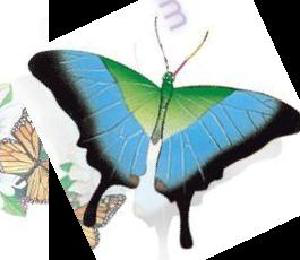

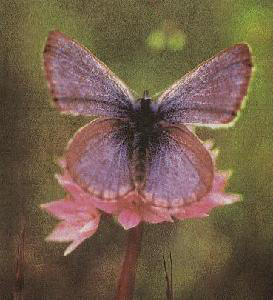

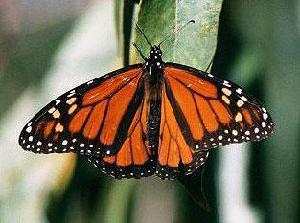

In [44]:
# Image under different labels are stored in different directories
ALL_CLASS_NAMES = [item.name for item in data_dir.glob('*')]

# For our problem we will restrict to these four classes
CLASS_NAMES     = np.array(['butterfly','dragonfly','crab','scorpion'])

butterfly = list(data_dir.glob('./butterfly/*.jpg'))
for image_path in butterfly[:3]:
    display.display(Image.open(str(image_path)))


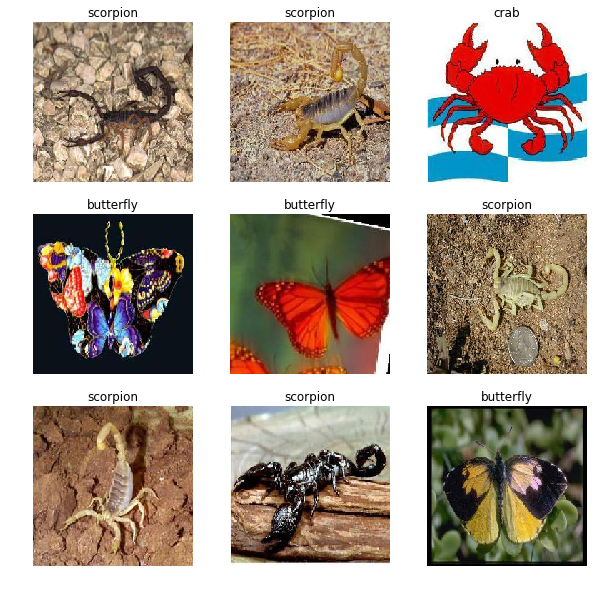

In [46]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(9):
      ax = plt.subplot(3,3,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0])
      plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)


## Build a Model

tf.keras functional API

In [52]:
from tensorflow.keras import Input, layers, Model

img_input = Input((224,224,3))
x = layers.Conv2D()



TypeError: __init__() missing 2 required positional arguments: 'filters' and 'kernel_size'

## tf.keras.utils

Mention other utitliites present in this module